In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
auto = pd.read_csv('auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.value_counts().isnull().sum()

0

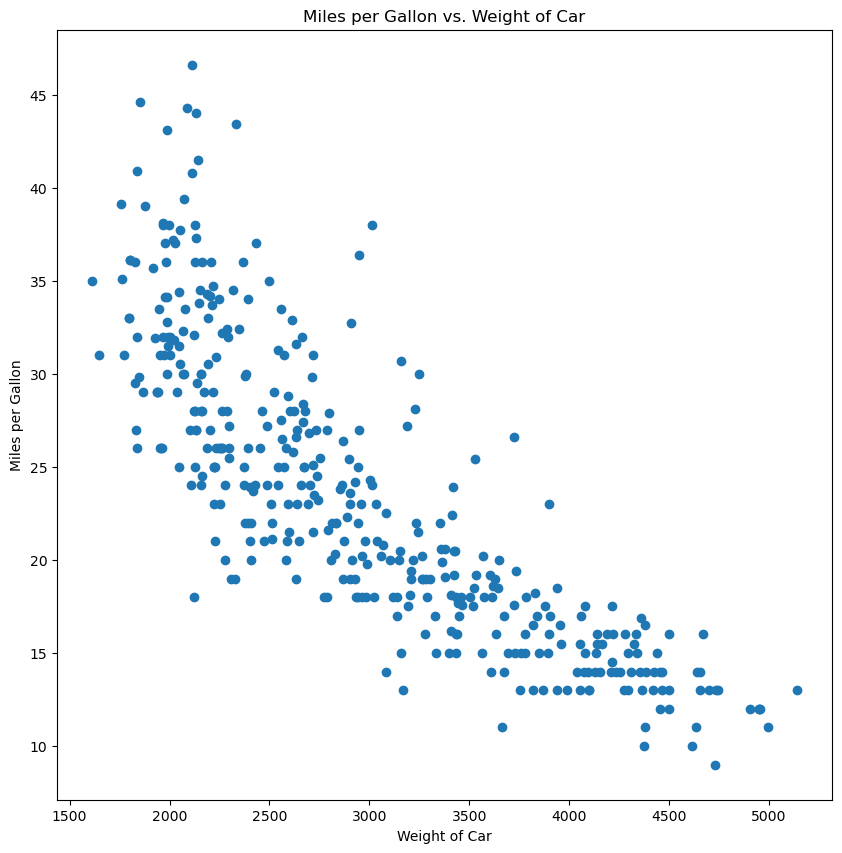

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(auto['weight'],auto['mpg'])
plt.title('Miles per Gallon vs. Weight of Car')
plt.xlabel('Weight of Car')
plt.ylabel('Miles per Gallon')
plt.show()

Using this scatterplot, we can easily observe that there does seem to be a clear relationship between the weight of each car and the mpg, where the heavier the car, the fewer miles per gallons it delivers (in short, more weight means more gas).

This is what we call a negative linear relationship, which, simply put, means that as the X-axis increases, the Y-axis decreases.

What we really need to determine is the line that best fits the data. In other words, we need a linear algebra equation that will tell us the mpg for a car of X weight. The basic linear algebra formula is as follows:

This formula means that to find y, we need to multiply x by a certain number, called weight (not to be confused with the weight of the car, which in this case, is our x), plus a certain number called bias (be ready to hear the word "bias" a lot in machine learning with many different meanings).

In this case, our y is the mpg, and our x is the weight of the car.

We could get out our calculators and start testing our math skills until we arrive at a good enough equation that seems to fit our data. For example, we could plug in the following formula into our scatterplot:
y = x / -105 + 55



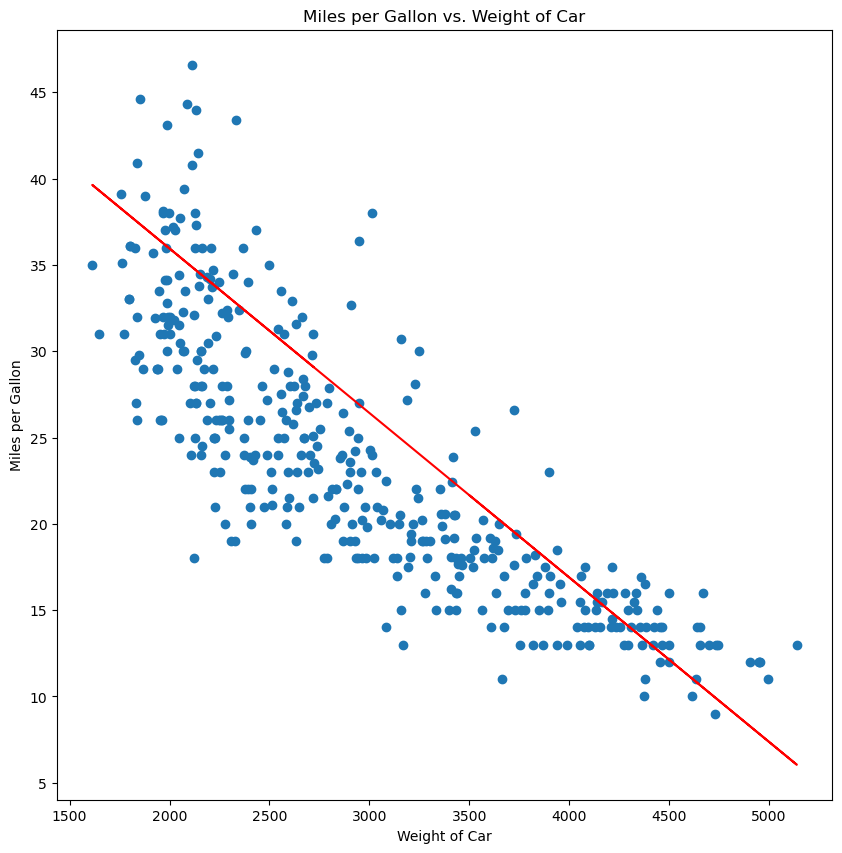

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(auto['weight'],auto['mpg'])
plt.plot(auto['weight'], (auto['weight'] / -105) + 55, c='red')
plt.title('Miles per Gallon vs. Weight of Car')
plt.xlabel('Weight of Car')
plt.ylabel('Miles per Gallon')
plt.show()

Although this line seems to fit the data, we can easily tell it’s off in certain areas, especially around cars that weight between 2,000 and 3,000 pounds.

Trying to determine the best fit line with some basic calculations and some guesswork is very time-consuming and usually leads us to an answer that tends to be far from the correct one.

The good news is that we have some interesting tools we can use to determine the best fit line, and in this case, we have linear regression.

We will be using the basic LinearRegression class from sklearn. This model will take our data and minimize a __Loss Function__ (in this case, one called Sum of Squares) step by step until it finds the best possible line to fit the data. Let’s code.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

TIP: When working with only one feature, remember to use double [[]] in pandas so that our series have at least a two-dimensional shape, or you will run into errors when training models.

In [10]:
X = auto[['weight']]
Y = auto['mpg']

Since LinearRegression is a class, we need to create a class object where we are going to train our model. Let’s call it MPG_Pred (using a capital letter at least at the begining of the variable name is a convention from Python class objects).

In [11]:
MPG_Pred = LinearRegression()

Now we are ready to train our model using the fit() function with our X and Y variables:

In [12]:
MPG_Pred.fit(X,Y)

LinearRegression()

And that’s it, we have trained our model. But how well do the predictions from our model match the data? Well, we can plot our data to determine how well our predictions, fitted on a line, match the data. This is what we get:

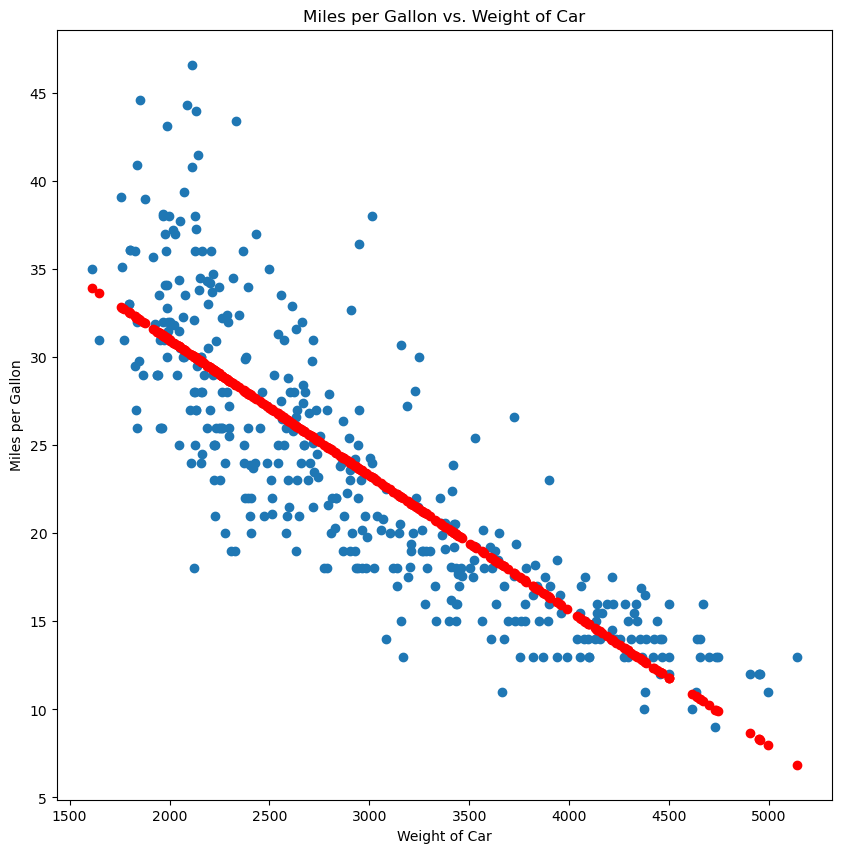

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(auto['weight'], auto['mpg'])
plt.scatter(X,MPG_Pred.predict(X), c='Red')
plt.title('Miles per Gallon vs. Weight of Car')
plt.xlabel('Weight of Car')
plt.ylabel('Miles per Gallon')
plt.show()